In [2]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import wave
from IPython.display import Audio

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

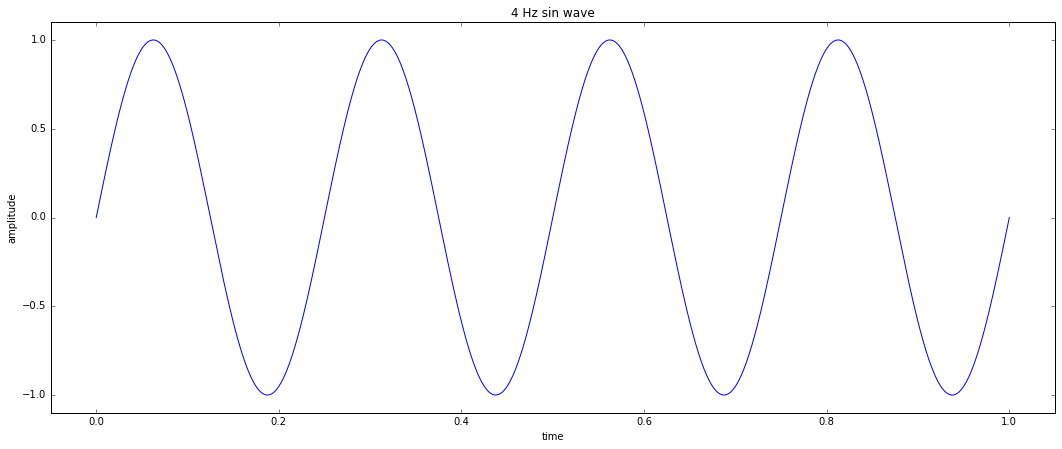

In [21]:
samp_rate = 1000
len_in_sec = 1
t = np.linspace(0, len_in_sec, samp_rate * len_in_sec)
hz_4 = 1*np.sin(4 * 2 * np.pi * t)

setup_graph(title='4 Hz sin wave', x_label='time', y_label='amplitude', fig_size=(18,7))
plt.plot(t, hz_4)
plt.margins(0.05)

### Derivative of a sine wave?

\begin{equation*}
\frac{d}{dt} sin(x) = cos(x)
\end{equation*}

What? Another (phase-shifted) sine wave. Which would mean, the second derivative of `sin(x)` (or the first derivative of `cos(x)`) is yet another sine wave:

\begin{equation*}
\frac{d}{dt} cos(x) = -sin(x)
\end{equation*}

And this goes on forever. So the shape of the sine wave is the epitome of continuous change.

This may remind you that

\begin{equation*}
\frac{d}{dt} e^x = e^x
\end{equation*}

This is not a coincidence - as we'll see below, sine waves and `e` are related.

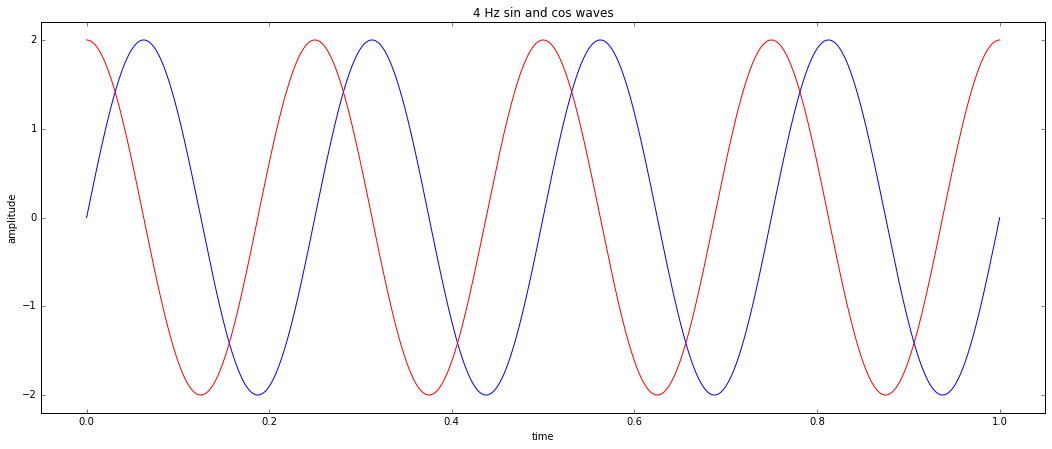

In [22]:
samp_rate = 1000
len_in_sec = 1
t = np.linspace(0, len_in_sec, samp_rate * len_in_sec)
sin_4hz = 2*np.sin(4 * 2 * np.pi * t)
cos_4hz = 2*np.cos(4 * 2 * np.pi * t)

setup_graph(title='4 Hz sin and cos waves', x_label='time', y_label='amplitude', fig_size=(18,7))
plt.plot(t, sin_4hz)
plt.plot(t, cos_4hz, color='red')
plt.margins(0.05)

# Superposition

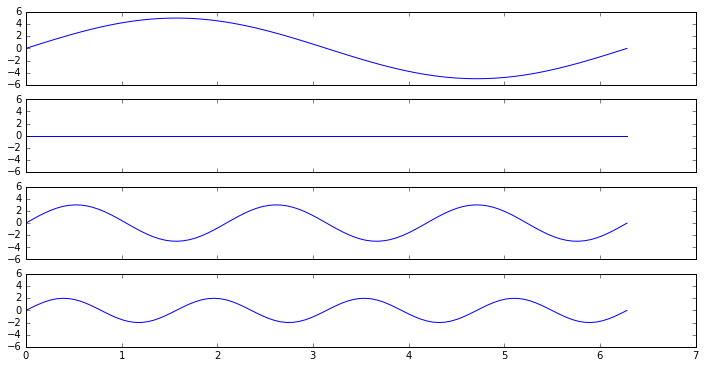

In [23]:
# Two subplots, the axes array is 1-d
x = np.linspace(0, 2 * np.pi, 100)
y1 = 5 * np.sin(x)
y2 = 0 * np.sin(2*x)
y3 = 3 * np.sin(3*x)
y4 = 2 * np.sin(4*x)

f, axarr = plt.subplots(4, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
axarr[3].plot(x, y4)
_ = plt.show()

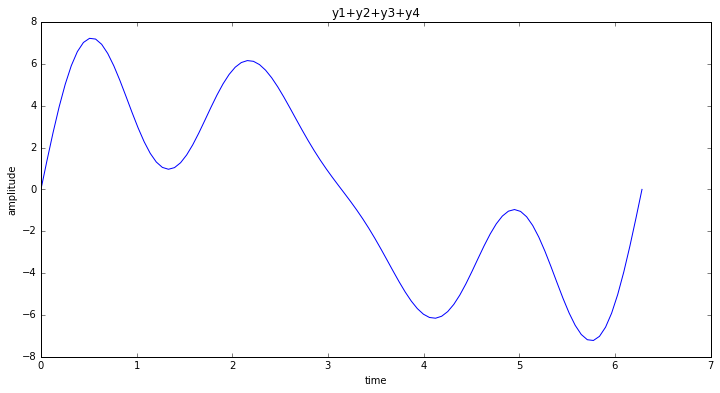

In [24]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', fig_size=(12,6))
convoluted_wave = y1 + y2 + y3 + y4
_ = plt.plot(x, convoluted_wave)

## Cancelation pattern

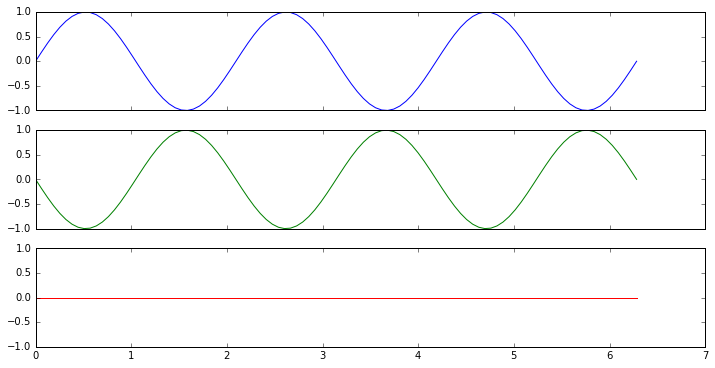

In [25]:
y5 = np.sin(3 * x)
y6 = -1 * np.sin(3 * x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y5, 'b')
axarr[1].plot(x, y6, 'g')
axarr[2].plot(x, y5 + y6, 'r')
_ = plt.show()

## Reinforcing pattern

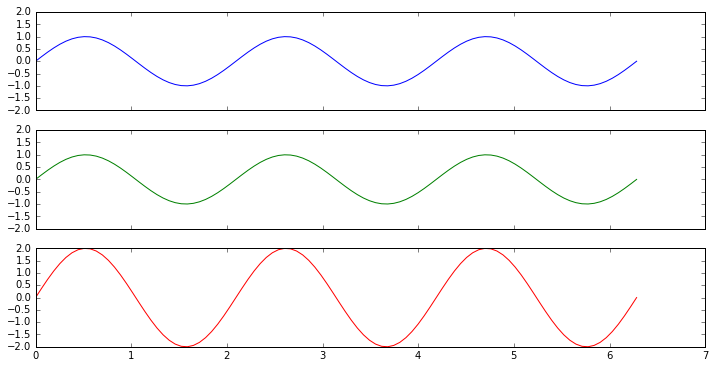

In [26]:
y5 = np.sin(3 * x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y5, 'b')
axarr[1].plot(x, y5, 'g')
axarr[2].plot(x, y5 + y5, 'r')
_ = plt.show()

# Orthogonality of waves

Waves of differing frequencies are orthogonal to one another (dot product is zero):

In [30]:
t = np.linspace(0, 1, samp_rate * len_in_sec)
sin_8hz = 1*np.sin(8 * 2 * np.pi * t)
sin_12hz = 1*np.sin(12 * 2 * np.pi * t)
np.dot(sin_8hz, sin_12hz)

2.0790660859582033e-15

Whereas, waves of the same (or close) frequencies hare larger dot products:

In [31]:
t = np.linspace(0, 1, samp_rate * len_in_sec)
sin_8hz = 1*np.sin(8 * 2 * np.pi * t)
sin_8_1hz = 1*np.sin(8.1 * 2 * np.pi * t)
np.dot(sin_8hz, sin_8_1hz)

464.37702127330243

### How close do the frequencies have to be in order to have a non-zero dot product?

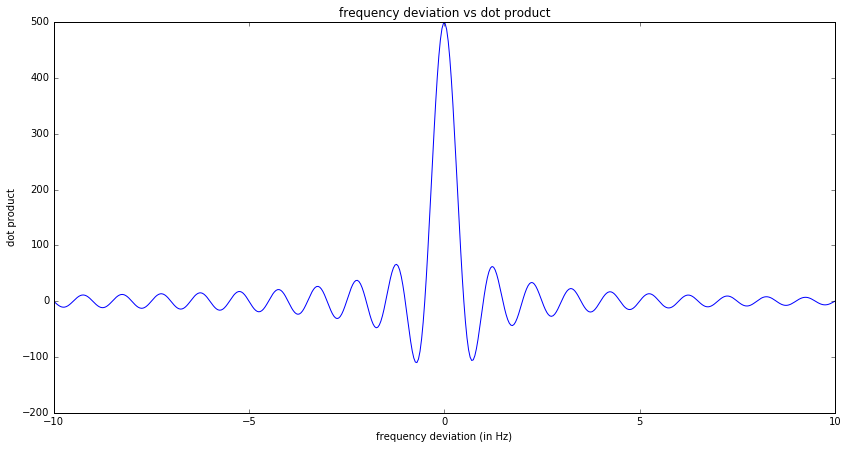

In [28]:
def dot_between_freqs(f1, f2):
    t = np.linspace(0, 1, samp_rate * len_in_sec)
    f1_samples = 1*np.sin(f1 * 2 * np.pi * t)
    f2_samples = 1*np.sin(f2 * 2 * np.pi * t)
    return np.dot(f1_samples, f2_samples)

center_freq = 20
frequency_diffs = np.linspace(-10, 10, 500)
dots = [dot_between_freqs(center_freq, center_freq+d) for d in frequency_diffs]
setup_graph(title='frequency deviation vs dot product', x_label='frequency deviation (in Hz)', y_label='dot product', fig_size=(14,7))
plt.plot(frequency_diffs, dots)

# Relation to e

## Euler's Formula
$$e^{ix} = \cos(x) + i \sin(x)$$


So raising $e^{ix}$ produces rotation (in the Complex plane)


### Related to Euler's Identity

$$e^{i \pi} + 1 = 0$$

* At $x = \pi$, $\sin(\pi) = 0$, and $\cos(\pi) = -1$
* So $e^{i \pi} = -1 + 0$
* Move the 1 over: $e^{i \pi} + 1 = 0$

### Complex Plane
![Complex Plane](images/complex_plane.jpg)

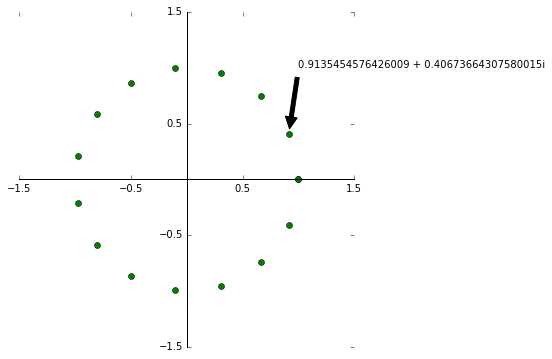

In [33]:
# Generate some complex numbers, and convert them to (x,y) coordinates
complex_points = [np.e**(1j * i) for i in np.linspace(0, 2*np.pi, 16)]
real_parts = [z.real for z in complex_points]
imag_parts = [z.imag for z in complex_points]

# Matplotlib code to draw graph
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlim((-1.5,1.5))
ax.set_xticks(np.linspace(-1.5,1.5,4))
ax.set_ylim((-1.5,1.5))
ax.set_yticks(np.linspace(-1.5,1.5,4))
ax.annotate("{0} + {1}i".format(real_parts[1], imag_parts[1]), xy=(real_parts[1], \
            imag_parts[1]), xytext=(1,1), arrowprops=dict(facecolor='black', shrink=0.08))

_ = plt.plot(real_parts, imag_parts, 'go')

## Circles produce sin (and cos) waves with e

So since raising `e^ix` produces rotation (a circle), you can think of it as a 3-dimentional sine wave. You can also produce normal 2-dimentional sin and cos waves by just imaginary and real parts, respectively:

In [34]:
t = np.linspace(0, 3 * 2*np.pi, 100)
e_func = [np.e**(1j * i) for i in t]

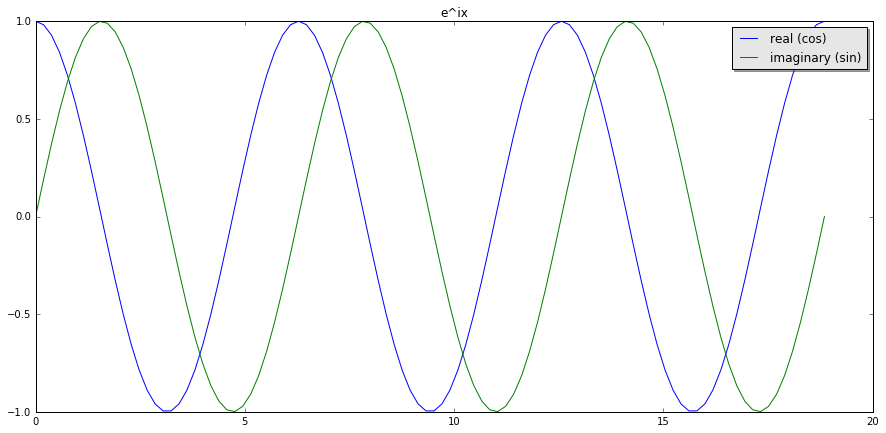

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.set_title('e^ix')

ax.plot(t, [i.real for i in e_func], label='real (cos)')
ax.plot(t, [i.imag for i in e_func], label='imaginary (sin)')

legend = ax.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()